## Use FLAML to solve [House Prices Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### Install FLAML

In [1]:
!pip3 install flaml

### Load datasets

In [2]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Inspect the target data:

In [4]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

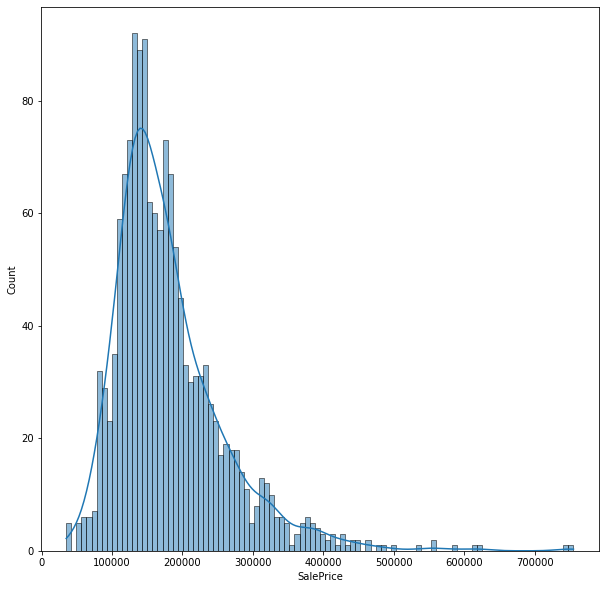

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.histplot(data=train, x='SalePrice', bins=100, kde=True)
plt.show()

### Data preprocessing and feature selection

Inspect columns with missing values:

In [6]:
missing = train.isna().sum()

missing[missing > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Encode categorical columns:

In [7]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

le = LabelEncoder()

for col in train.columns:
    if train[col].dtype == 'object':
        le.fit(train[col])
        le_dict = defaultdict(lambda: len(le.classes_), dict(zip(le.classes_, le.transform(le.classes_))))
        train[col] = train[col].map(le_dict)
        test[col] = test[col].map(le_dict)
        print('Encoding:', col, le.classes_)

Encoding: MSZoning ['C (all)' 'FV' 'RH' 'RL' 'RM']
Encoding: Street ['Grvl' 'Pave']
Encoding: Alley ['Grvl' 'Pave' nan]
Encoding: LotShape ['IR1' 'IR2' 'IR3' 'Reg']
Encoding: LandContour ['Bnk' 'HLS' 'Low' 'Lvl']
Encoding: Utilities ['AllPub' 'NoSeWa']
Encoding: LotConfig ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
Encoding: LandSlope ['Gtl' 'Mod' 'Sev']
Encoding: Neighborhood ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
Encoding: Condition1 ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
Encoding: Condition2 ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
Encoding: BldgType ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
Encoding: HouseStyle ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
Encoding: RoofStyle ['Flat' 'Gable' 'Gambrel' 'Hi

Fill the rest of missing values in training set as 0 (these data are probably non-existent anyway, no need to impute them):

In [8]:
missing = train.isna().sum()

for col in missing[missing > 0].index:
    print('Train: filling 0 in', col)
    train[col].fillna(0, inplace=True)

Train: filling 0 in LotFrontage
Train: filling 0 in MasVnrArea
Train: filling 0 in GarageYrBlt


It turns out more columns in the test set contain missing values. Fill these as 0 as well:

In [9]:
missing = test.isna().sum()

for col in missing[missing > 0].index:
    print('Test: filling 0 in', col)
    test[col].fillna(0, inplace=True)

Test: filling 0 in LotFrontage
Test: filling 0 in MasVnrArea
Test: filling 0 in BsmtFinSF1
Test: filling 0 in BsmtFinSF2
Test: filling 0 in BsmtUnfSF
Test: filling 0 in TotalBsmtSF
Test: filling 0 in BsmtFullBath
Test: filling 0 in BsmtHalfBath
Test: filling 0 in GarageYrBlt
Test: filling 0 in GarageCars
Test: filling 0 in GarageArea


Use ```YrSold``` (Year Sold) to subtract ```YearBuilt``` (original construction date), ```YearRemodAdd``` (remodel date) ```GarageYrBlt``` (year garage was built) to indicate *how many years* have passed since these dates:

In [10]:
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for col in year_cols:
    train[col] = train.YrSold - train[col]
    test[col] = test.YrSold - test[col]

Remove ```Id``` and target column:

In [11]:
train.pop('Id')
target = train.pop('SalePrice').copy()
predict_id = test.pop('Id')

Scale all features (only use the information from the training set):

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

Since there are a lot of features, we will do [L1-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model) using scikit-learn's *SelectFromModel* (which use a *LassoLarsCV* model):

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoLarsCV

estimator = LassoLarsCV(normalize=False, max_iter=1000, n_jobs=-1)
select_model = SelectFromModel(estimator=estimator)
select_model.fit(train.to_numpy(), target.to_numpy())

select_cols = select_model.get_feature_names_out(train.columns).tolist()
print('Selected columns:', len(select_cols))
print(select_cols)

Selected columns: 47
['MSSubClass', 'LotArea', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'Fence', 'YrSold', 'SaleType', 'SaleCondition']


Select the columns above:

In [14]:
train = train[select_cols]
test = test[select_cols]

Scale the target column, and inspect all correlation between features/target:

In [15]:
train['SalePrice'] = target / 100000

train.corr().SalePrice

MSSubClass      -0.084284
LotArea          0.263843
Alley            0.139868
LotShape        -0.255580
LandContour      0.015453
LandSlope        0.051152
Neighborhood     0.210851
BldgType        -0.085591
HouseStyle       0.180163
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt       -0.523350
YearRemodAdd    -0.509079
RoofStyle        0.222405
RoofMatl         0.132383
Exterior1st      0.103551
MasVnrType       0.029658
MasVnrArea       0.472614
ExterQual       -0.636884
Foundation       0.382479
BsmtQual        -0.620886
BsmtCond         0.015058
BsmtExposure    -0.309043
BsmtFinType1    -0.103114
BsmtFinSF1       0.386420
BsmtUnfSF        0.214479
HeatingQC       -0.400178
CentralAir       0.251328
1stFlrSF         0.605852
GrLivArea        0.708624
BsmtFullBath     0.227122
FullBath         0.560664
KitchenQual     -0.589189
TotRmsAbvGrd     0.533723
Functional       0.115328
Fireplaces       0.466929
FireplaceQu     -0.459605
GarageYrBlt     -0.261441
GarageFinish

### Train a FLAML model

Using *LightGBM* and *XGBoost* to build an stacking ensemble model:

In [16]:
from flaml import AutoML

reg = AutoML()
reg.fit(dataframe=train, label='SalePrice',
        task='regression', 
        estimator_list=['lgbm', 'xgboost'], 
        metric='rmse',
        ensemble=True,
        time_budget=10800)

[flaml.automl: 02-06 04:00:36] {2051} INFO - task = regression
[flaml.automl: 02-06 04:00:36] {2053} INFO - Data split method: uniform
[flaml.automl: 02-06 04:00:36] {2057} INFO - Evaluation method: cv
[flaml.automl: 02-06 04:00:36] {2138} INFO - Minimizing error metric: rmse
[flaml.automl: 02-06 04:00:36] {2196} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost']
[flaml.automl: 02-06 04:00:36] {2449} INFO - iteration 0, current learner lgbm
[flaml.automl: 02-06 04:00:36] {2562} INFO - Estimated sufficient time budget=1484s. Estimated necessary time budget=1s.
[flaml.automl: 02-06 04:00:36] {2609} INFO -  at 0.2s,	estimator lgbm's best error=0.6323,	best estimator lgbm's best error=0.6323
[flaml.automl: 02-06 04:00:36] {2449} INFO - iteration 1, current learner lgbm
[flaml.automl: 02-06 04:00:36] {2609} INFO -  at 0.3s,	estimator lgbm's best error=0.6323,	best estimator lgbm's best error=0.6323
[flaml.automl: 02-06 04:00:36] {2449} INFO - iteration 2, current learner lgbm
[fl

In [17]:
print('Best ML leaner:', reg.best_estimator)
print('Best hyperparmeter config:', reg.best_config)

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 1459, 'max_leaves': 44, 'min_child_weight': 0.33147382204958753, 'learning_rate': 0.07935526621700568, 'subsample': 0.9853489269182679, 'colsample_bylevel': 0.8762994552753757, 'colsample_bytree': 0.5148149332165884, 'reg_alpha': 0.19912076968380016, 'reg_lambda': 0.016156788428837623}


In [18]:
predicted = reg.predict(train.drop(['SalePrice'], axis=1))

from sklearn.metrics import mean_squared_log_error

print('Train dataset RMSLE:', mean_squared_log_error(train.SalePrice * 100000, predicted * 100000, squared=False).round(5))

Train dataset RMSLE: 0.04391


### Predict test labels and generate submission

In [19]:
predicted = reg.predict(test) * 100000

submission = pd.DataFrame({'Id': predict_id, 'SalePrice': predicted})
submission.to_csv('./submission.csv', index=False)

submission

,Id,SalePrice
0,1461,124609.820193
1,1462,153793.461207
2,1463,183760.939871
3,1464,193948.188176
4,1465,185266.431700
...,...,...
1454,2915,80199.938549
1455,2916,78840.279146
1456,2917,168157.193554
1457,2918,117387.383771


* Kaggle score (RMSLE): **0.12567**

### How good is the score?

Check out Kaggle leaderboard's histogram:

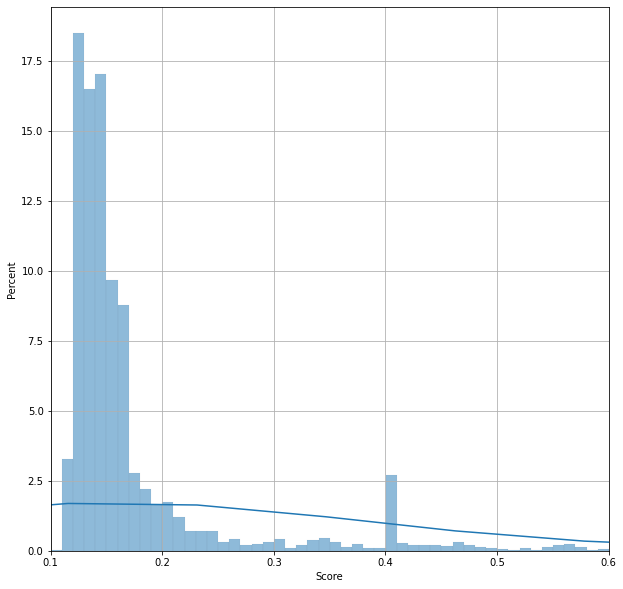

In [20]:
score_df = pd.read_csv('./house-prices-advanced-regression-techniques-publicleaderboard.csv')
max_score = score_df.Score.max()

plt.figure(figsize=(10, 10))
sns.histplot(data=score_df, x='Score', bins=round(max_score)*100, kde=True, stat='percent')
plt.xlim([0.1, 0.6])
plt.grid(True)
plt.show()